In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pathlib import Path

In [88]:
chart_color = 'lightseagreen'

In [89]:
root_dir = Path(os.getcwd()).parent.parent
eda_images_dir = root_dir / 'images/eda/'
dataset_path = root_dir / 'data/train-metadata.csv'
df = pd.read_csv(dataset_path)

C:\Users\User\AppData\Local\Temp\ipykernel_12220\2467847699.py:4: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(dataset_path)


In [90]:
df.head(3)

,isic_id,target,patient_id,age_approx,sex,anatom_site_general,clin_size_long_diam_mm,image_type,tbp_tile_type,tbp_lv_A,...,lesion_id,iddx_full,iddx_1,iddx_2,iddx_3,iddx_4,iddx_5,mel_mitotic_index,mel_thick_mm,tbp_lv_dnn_lesion_confidence
0,ISIC_0015670,0,IP_1235828,60.0,male,lower extremity,3.04,TBP tile: close-up,3D: white,20.244422,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,97.517282
1,ISIC_0015845,0,IP_8170065,60.0,male,head/neck,1.10,TBP tile: close-up,3D: white,31.712570,...,IL_6727506,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,3.141455
2,ISIC_0015864,0,IP_6724798,60.0,male,posterior torso,3.40,TBP tile: close-up,3D: XP,22.575830,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.804040


In [91]:
df['target'].value_counts()

target
0    400666
1       393
Name: count, dtype: int64

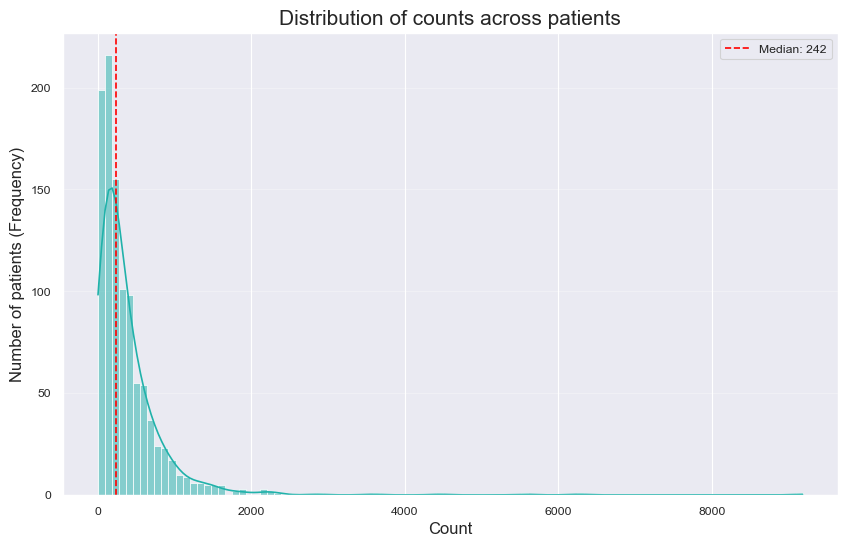

In [ ]:
patient_counts = df.groupby('patient_id').size()

plt.figure(figsize=(10, 6))

sns.histplot(patient_counts, bins=100, kde=True, color=chart_color)

plt.title('Distribution of counts across patients', fontsize=15)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Number of patients (frequency)', fontsize=12)

plt.axvline(patient_counts.median(), color='red', linestyle='--', label=f'Median: {patient_counts.median():.0f}')
plt.legend()

plt.grid(axis='y', alpha=0.3)
plt.savefig(eda_images_dir / 'distribution_of_counts_across_patients_hist.jpg')
plt.show()

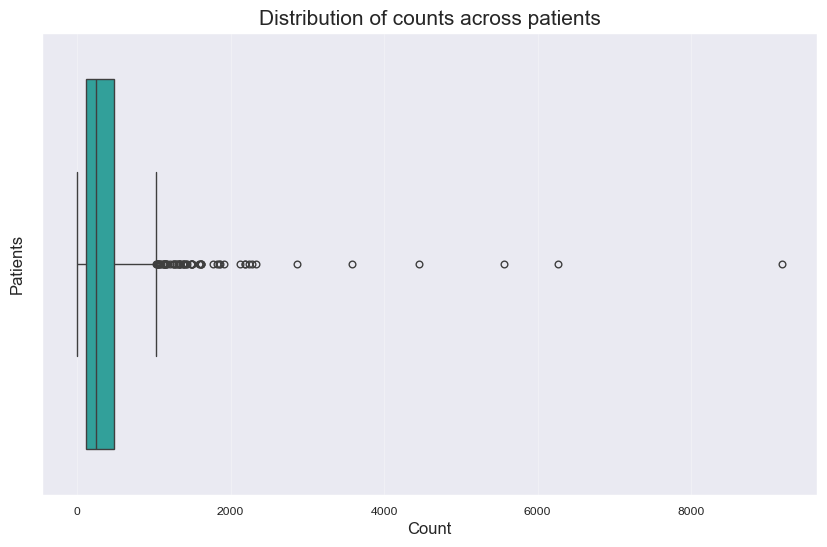

In [93]:
patient_counts = df.groupby('patient_id').size()

plt.figure(figsize=(10, 6))

sns.boxplot(x=patient_counts, color=chart_color)

plt.title('Distribution of counts across patients', fontsize=15)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Patients', fontsize=12)
plt.grid(axis='x', alpha=0.3)

plt.savefig(eda_images_dir / 'distribution_of_counts_across_patients_box.jpg')
plt.show()

Number of patients that have malignant lesions: 259


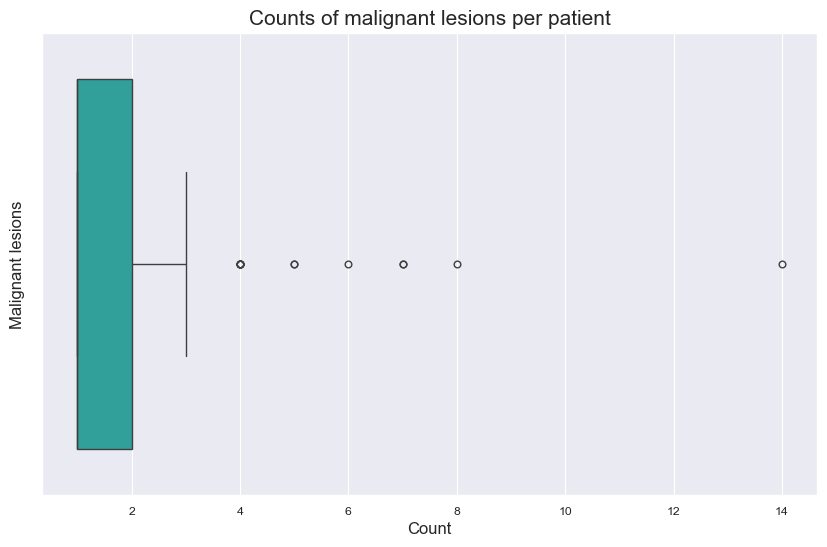

In [94]:
malignant = df[df['target'] == 1]

print(f'Number of patients that have malignant lesions: {malignant['patient_id'].unique().shape[0]}')

malignant_counts = malignant.groupby('patient_id').size()

plt.figure(figsize=(10, 6))

sns.boxplot(x=malignant_counts, color=chart_color)

plt.title('Counts of malignant lesions per patient', fontsize=15)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Malignant lesions', fontsize=12)
plt.savefig(eda_images_dir / 'patients_with_most_malignant.jpg')
plt.show()

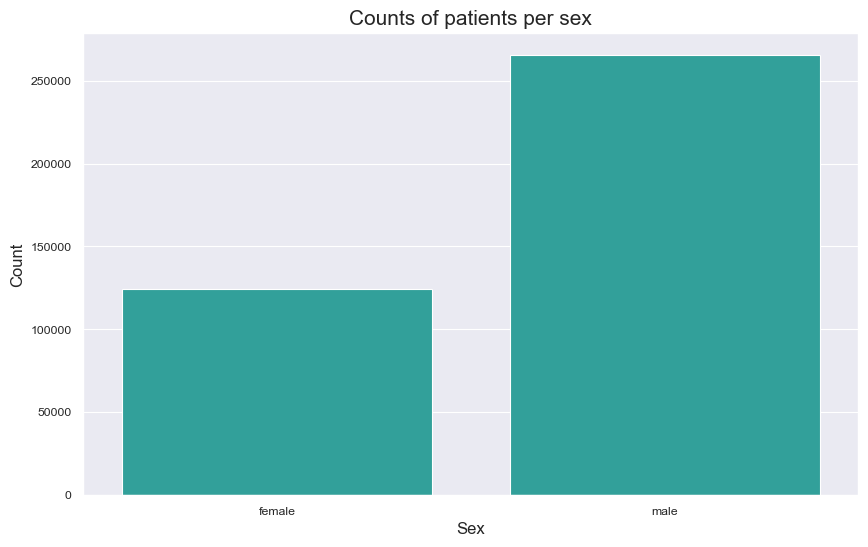

In [97]:
sex_counts = df.groupby('sex').size()

plt.figure(figsize=(10, 6))

sns.barplot(sex_counts, color=chart_color)

plt.title('Counts of patients per sex', fontsize=15)
plt.xlabel('Sex', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.savefig(eda_images_dir / 'counts_of_patients_per_sex.jpg')
plt.show()

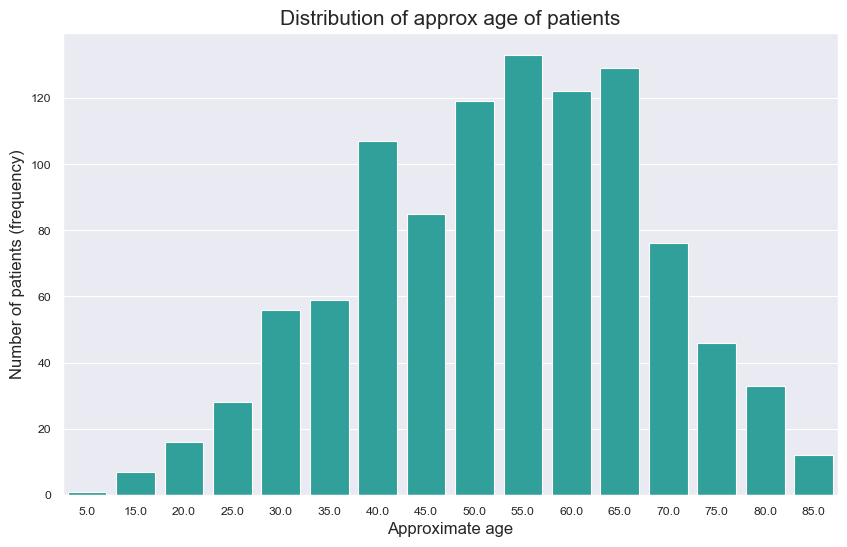

In [152]:
ages_df = df.drop_duplicates(subset=['patient_id'], keep='first')

plt.figure(figsize=(10, 6))

sns.countplot(data=ages_df, x='age_approx', color=chart_color)

plt.title('Distribution of approx age of patients', fontsize=15)
plt.xlabel('Approximate age', fontsize=12)
plt.ylabel('Number of patients (frequency)', fontsize=12)


plt.savefig(eda_images_dir / 'distribution_of_ages.jpg')
plt.show()

In [ ]:
df[(df['target'] == 0) & (df['iddx_full'] != 'Benign')][['target', 'iddx_full']]

,target,iddx_full
166,0,Benign::Benign epidermal proliferations::Liche...
272,0,Benign::Benign melanocytic proliferations::Nev...
515,0,Benign::Benign melanocytic proliferations::Nevus
1816,0,Benign::Benign melanocytic proliferations::Nevus
2338,0,Indeterminate::Indeterminate epidermal prolife...
...,...,...
399630,0,Benign::Benign melanocytic proliferations::Nev...
399921,0,Benign::Benign melanocytic proliferations::Nev...
400295,0,Benign::Benign melanocytic proliferations::Nev...
400523,0,Benign::Benign epidermal proliferations::Sebor...


In [ ]:
df.iloc[166][['target', 'iddx_full', 'iddx_1', 'iddx_2', 'iddx_3', 'iddx_4', 'iddx_5']]

target                                                       0
iddx_full    Benign::Benign epidermal proliferations::Liche...
iddx_1                                                  Benign
iddx_2                         Benign epidermal proliferations
iddx_3                            Lichen planus like keratosis
iddx_4                                                     NaN
iddx_5                                                     NaN
Name: 166, dtype: object

In [ ]:
df[(df['target'] == 0) & (df['iddx_full'] != 'Benign')][['target', 'iddx_full']].iloc[0]['iddx_full']

'Benign::Benign epidermal proliferations::Lichen planus like keratosis'

In [ ]:
df['anatom_site_general'].value_counts()

anatom_site_general
posterior torso    121902
lower extremity    103028
anterior torso      87770
upper extremity     70557
head/neck           12046
Name: count, dtype: int64

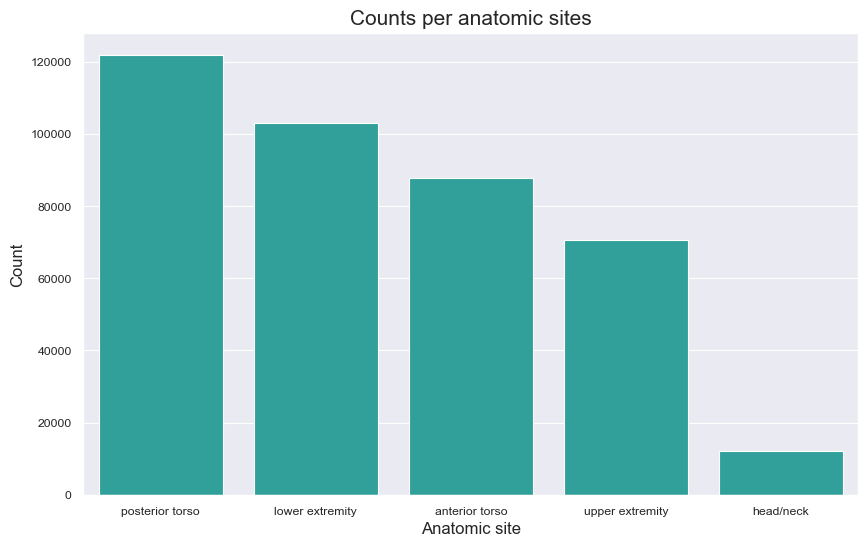

In [ ]:
anatom_sites = df['anatom_site_general'].value_counts()

plt.figure(figsize=(10, 6))

sns.barplot(anatom_sites, color=chart_color)

plt.title('Counts per anatomic sites', fontsize=15)
plt.xlabel('Anatomic site', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.savefig(eda_images_dir / 'counts_per_anatomic_sites.jpg')
plt.show()

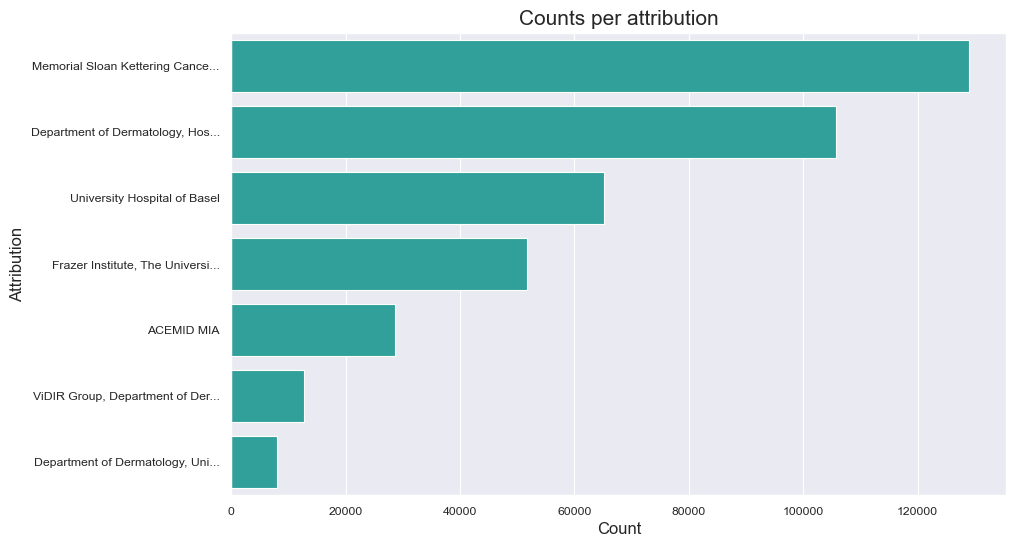

In [157]:
locations_counts = df['attribution'].value_counts()
shortened_names = [
    f'{name[:30]}...' if len(name) > 30 else name 
    for name in locations_counts.index
]

plt.figure(figsize=(10, 6))
sns.barplot(x=locations_counts.values, y=shortened_names, color=chart_color)
plt.title('Counts per attribution', fontsize=15)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Attribution', fontsize=12)
plt.savefig(eda_images_dir / 'counts_per_attribution.jpg')
plt.show()

In [159]:
import random
from tqdm import tqdm
from PIL import Image

images_path = root_dir / 'data/train-image/image'
all_files = [f.path for f in os.scandir(images_path) if f.name.endswith('.jpg')]

sample_files = random.sample(all_files, 10000)

shapes = []
for p in tqdm(sample_files):
    with Image.open(p) as img:
        shapes.append(img.size)
shapes

100%|██████████| 10000/10000 [01:28<00:00, 112.41it/s]


[(143, 143),
 (127, 127),
 (131, 131),
 (103, 103),
 (155, 155),
 (109, 109),
 (121, 121),
 (139, 139),
 (125, 125),
 (123, 123),
 (161, 161),
 (151, 151),
 (109, 109),
 (169, 169),
 (119, 119),
 (115, 115),
 (129, 129),
 (137, 137),
 (143, 143),
 (111, 111),
 (141, 141),
 (131, 131),
 (131, 131),
 (157, 157),
 (147, 147),
 (103, 103),
 (139, 139),
 (187, 187),
 (109, 109),
 (95, 95),
 (231, 231),
 (131, 131),
 (129, 129),
 (129, 129),
 (133, 133),
 (141, 141),
 (133, 133),
 (145, 145),
 (125, 125),
 (103, 103),
 (125, 125),
 (115, 115),
 (157, 157),
 (121, 121),
 (121, 121),
 (117, 117),
 (113, 113),
 (131, 131),
 (135, 135),
 (125, 125),
 (115, 115),
 (127, 127),
 (147, 147),
 (135, 135),
 (141, 141),
 (125, 125),
 (151, 151),
 (131, 131),
 (143, 143),
 (137, 137),
 (133, 133),
 (127, 127),
 (131, 131),
 (129, 129),
 (143, 143),
 (145, 145),
 (135, 135),
 (119, 119),
 (117, 117),
 (123, 123),
 (159, 159),
 (129, 129),
 (109, 109),
 (143, 143),
 (131, 131),
 (127, 127),
 (153, 153),
 

In [162]:
print(f'Number of unique shapes: {len(set(shapes))}')

h_values, w_values = zip(*shapes)
print('min height:', min(h_values))
print('max height:', max(h_values))
print('min width:', min(w_values))
print('max width:', max(w_values))

Number of unique shapes: 82
min height: 55
max height: 241
min width: 55
max width: 241


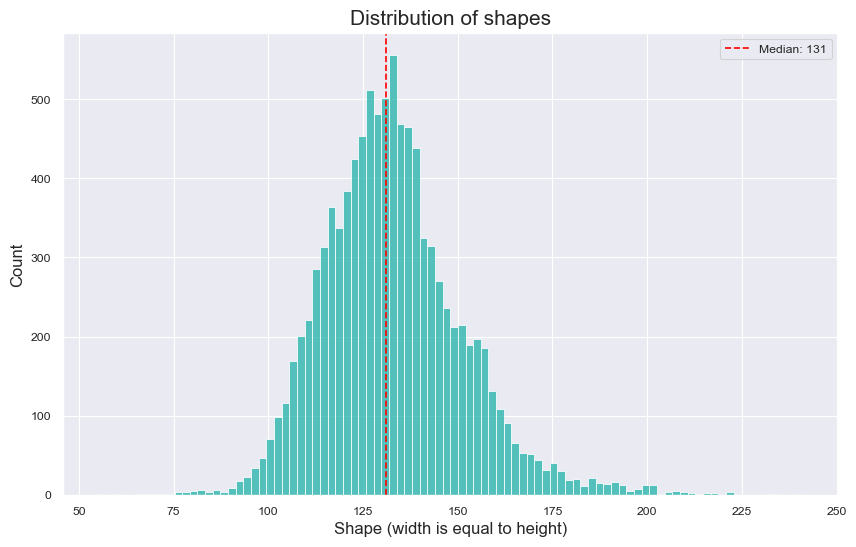

In [168]:
plt.figure(figsize=(10, 6))
sns.histplot(h_values, color=chart_color)
plt.title('Distribution of shapes', fontsize=15)
plt.xlabel('Shape (width is equal to height)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.axvline(np.median(h_values), color='red', linestyle='--', label=f'Median: {np.median(h_values):.0f}')
plt.legend()
plt.savefig(eda_images_dir / 'distribution_of_shapes.jpg')
plt.show()

In [169]:
sum([h != w for h, w in shapes])

0